In [1]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
from sklearn.model_selection import train_test_split
X = df.drop('species',axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=10,metric='minkowski',weights='distance',algorithm='auto')
model_knn.fit(X_train,y_train)

,n_neighbors,10
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [5]:
model_knn.score(X_test,y_test)

0.98

In [24]:
from sklearn.svm import SVC
model_svm = SVC(C=10,kernel='rbf',gamma='auto')


In [25]:
model_svm.fit(X_train,y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [26]:
model_svm.score(X_test,y_test)

1.0

In [13]:

classifier_r = RandomizedSearchCV((model_svm),{
    'C':[1,10,20,30],
    'kernel':['linear','rbf']
},n_iter=4,cv=5,return_train_score=False)


In [14]:
classifier_r.fit(X,y)

,estimator,"SVC(C=1, gamm...rnel='linear')"
,param_distributions,"{'C': [1, 10, ...], 'kernel': ['linear', 'rbf']}"
,n_iter,4
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [23]:
results = pd.DataFrame(classifier_r.cv_results_)
results[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,rbf,0.980000
1,20,rbf,0.966667
2,1,rbf,0.980000
3,20,linear,0.966667


<Axes: >

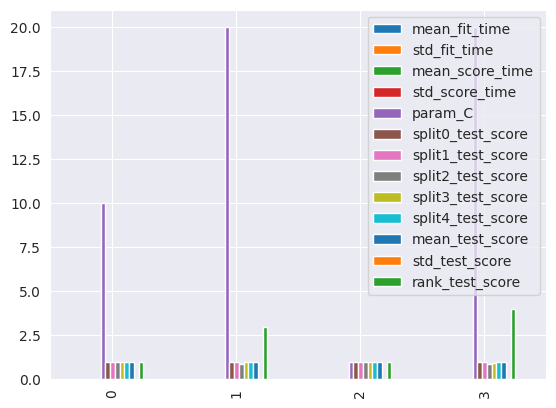

In [29]:
results.plot(kind='bar')